In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

In [3]:
data=pd.read_csv(r"C:\Users\Sujan H G\OneDrive\Desktop\Data analysis projects 2024\comprehensive_mutual_funds_data.csv")

In [5]:
data.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [9]:
data.columns

Index(['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd',
       'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category',
       'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr'],
      dtype='object')

In [11]:
data.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [13]:

data["returns_3yr"]=data.returns_3yr.fillna(value=data.returns_3yr.mean())
data["returns_5yr"]=data.returns_5yr.fillna(value=data.returns_5yr.mean())

In [15]:
data.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [17]:
data["beta"].value_counts()

beta
-        42
0.94     23
0.99     22
0.85     21
0.89     20
         ..
1.68      1
3.36      1
-0.52     1
1.29      1
0.14      1
Name: count, Length: 162, dtype: int64

In [19]:
data["sortino"]=data["sortino"].replace("-","0")
data["alpha"]=data["alpha"].replace("-","0")
data["sd"]=data["sd"].replace("-","0")
data["beta"]=data["beta"].replace("-","0")



In [21]:
data["sortino"]=data["sortino"].astype(float)
data["alpha"]=data["alpha"].astype(float)
data["sd"]=data["sd"].astype(float)
data["beta"]=data["beta"].astype(float)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    float64
 8   alpha          814 non-null    float64
 9   sd             814 non-null    float64
 10  beta           814 non-null    float64
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [25]:
risk_mapping = {
    1: 'Low risk',
    2: 'Low to moderate',
    3: 'Moderate',
    4: 'Moderately High',
    5: 'High',
    6: 'Very High'
}

In [27]:
data['risk_level'] = data['risk_level'].replace(risk_mapping)

In [29]:
data.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,Moderate,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.900000
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,Low risk,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.500000
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,High,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.700000
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,9.490726
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,Very High,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.700000


Performance Analysis

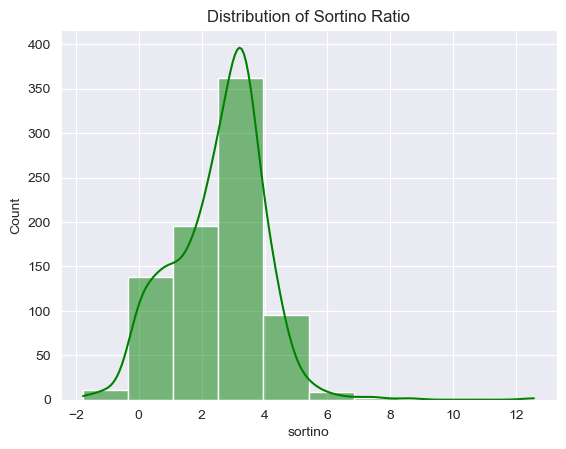

In [33]:
sns.set_style("dark")
sns.histplot(data['sortino'], bins=10, kde=True, color='green')
plt.grid()
plt.title('Distribution of Sortino Ratio')
plt.show()


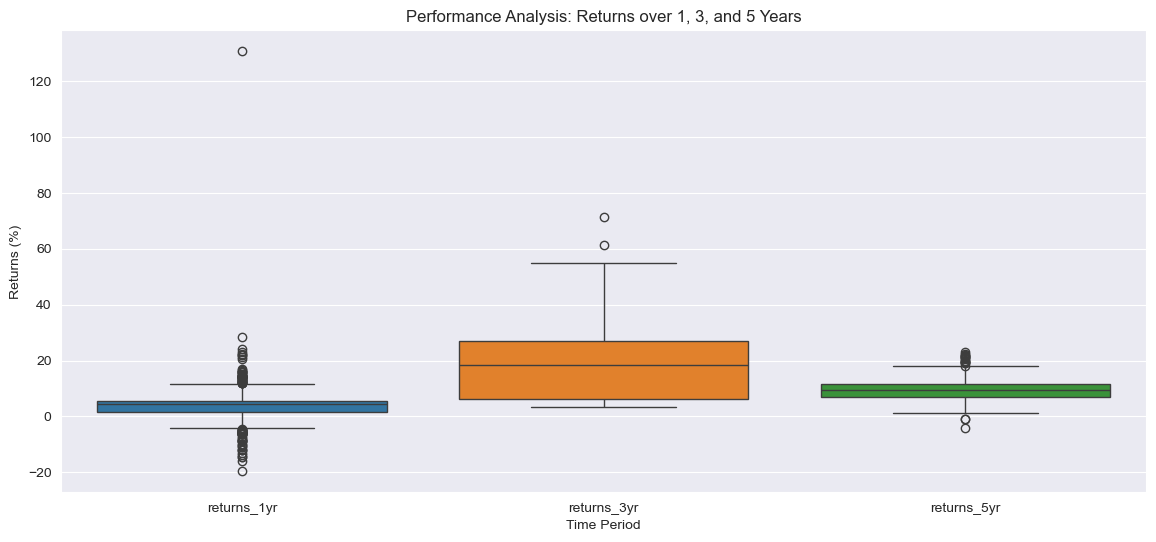

In [42]:
# performace analysis
sns.set_style("dark")
plt.figure(figsize=(14, 6))
plt.grid()
# Boxplot for returns
sns.boxplot(data=data[['returns_1yr', 'returns_3yr', 'returns_5yr']])
plt.title('Performance Analysis: Returns over 1, 3, and 5 Years')
plt.ylabel('Returns (%)')
plt.xlabel('Time Period')
plt.show()

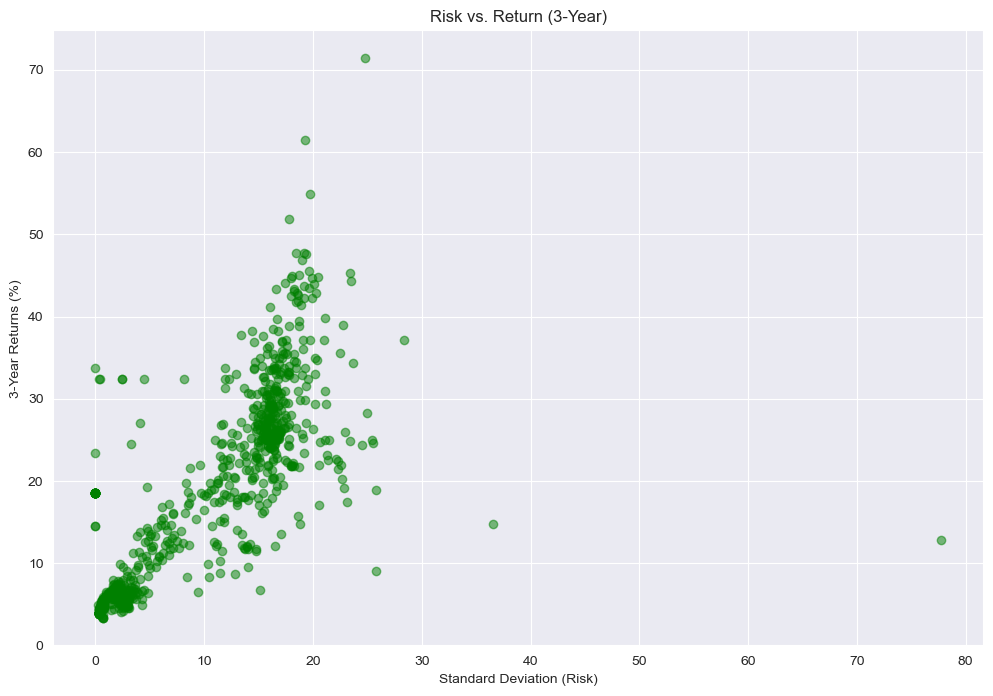

In [149]:
# Risk Analysis
sns.set_style("dark")
plt.figure(figsize=(12, 8))
plt.grid()
plt.scatter(data['sd'], data['returns_3yr'], alpha=0.5,color="green")
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('3-Year Returns (%)')
plt.title('Risk vs. Return (3-Year)')
plt.show()

In [52]:
# Calculate and print correlation between risk and return
correlation = data['sd'].corr(data['returns_3yr'])
print(f"Correlation between risk (standard deviation) and 3-year returns: {correlation:.2f}")

Correlation between risk (standard deviation) and 3-year returns: 0.78


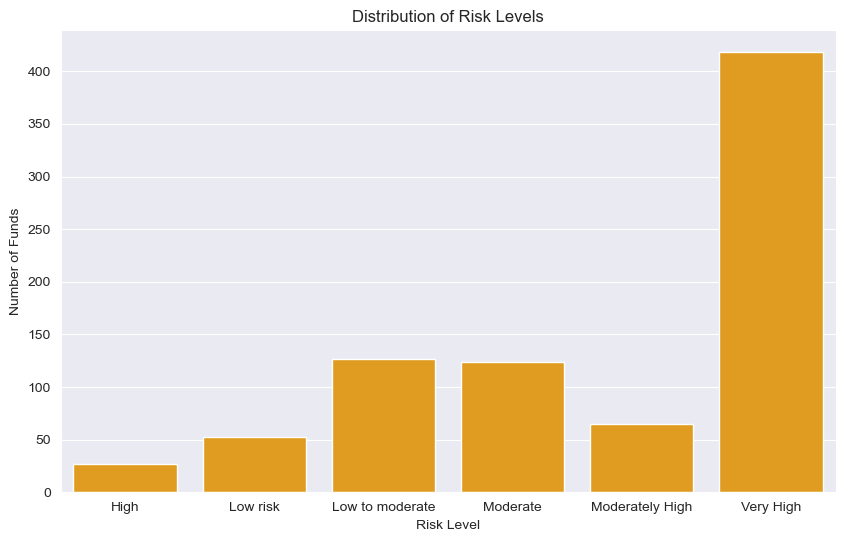

In [217]:
# Risk level distribution
plt.figure(figsize=(10, 6))
sns.set_palette('Oranges')
plt.grid()
sns.countplot(x='risk_level', data=data, order=data['risk_level'].value_counts().sort_index().index,color="orange")
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Number of Funds')
plt.show()

In [68]:
print("\
Risk Level Distribution:")
print(data['risk_level'].value_counts().sort_index())

Risk Level Distribution:
risk_level
High                27
Low risk            53
Low to moderate    127
Moderate           124
Moderately High     65
Very High          418
Name: count, dtype: int64


In [70]:
#fUND PERFORMANCE

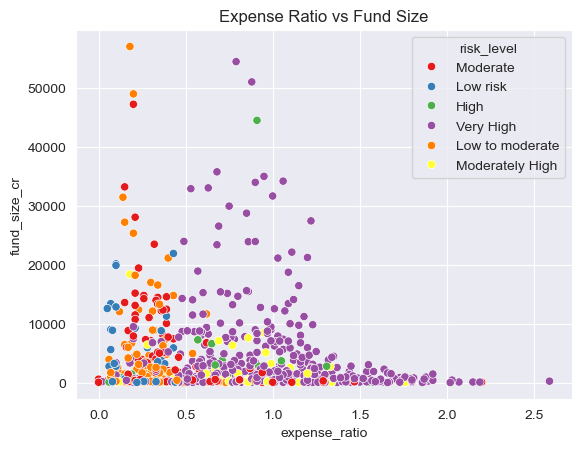

In [151]:
sns.set_style("dark")
plt.grid()
sns.scatterplot(data=data, x='expense_ratio', y='fund_size_cr', hue='risk_level', palette='Set1')
plt.title('Expense Ratio vs Fund Size')
plt.show()


In [79]:
# Calculate correlation between fund size and expense ratio
size_expense_corr = data['fund_size_cr'].corr(data['expense_ratio'])
print(f"Correlation between fund size and expense ratio: {size_expense_corr:.2f}")

Correlation between fund size and expense ratio: -0.11


In [99]:
import warnings
warnings.filterwarnings("ignore")

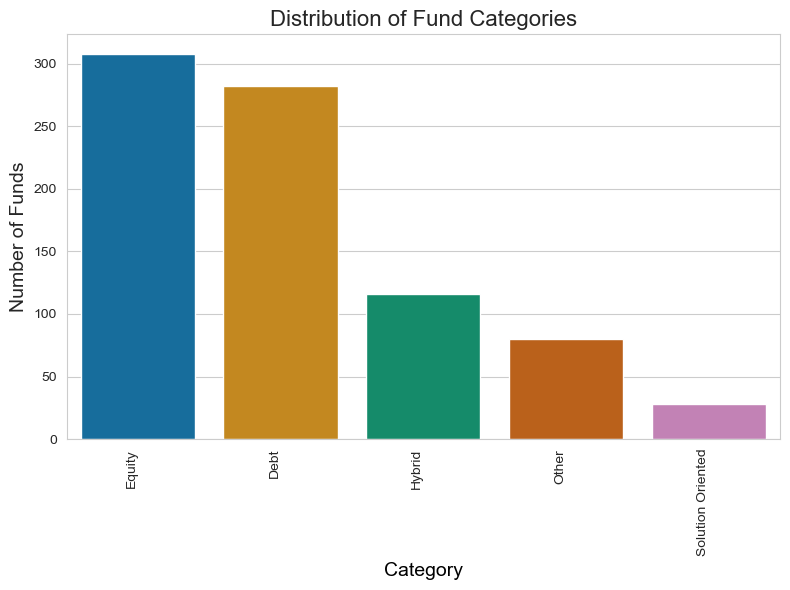

In [167]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=data, order=data['category'].value_counts().index, palette='colorblind')
plt.title('Distribution of Fund Categories', fontsize=16)
plt.xlabel('Category', fontsize=14,color="black")
plt.ylabel('Number of Funds', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
Image 5: Distribution of Fund Categories (Bar Chart)
Insights:

Equity funds are the most common category, followed closely by Debt funds.
Hybrid funds form a significant but smaller portion of the overall fund offerings.
There's a moderate number of "Other" category funds, suggesting specialized or niche offerings.
Solution Oriented funds are the least common category.
The distribution shows a clear preference for pure equity or debt funds over mixed or specialized options.

In [109]:
# Fund Manager Analysis

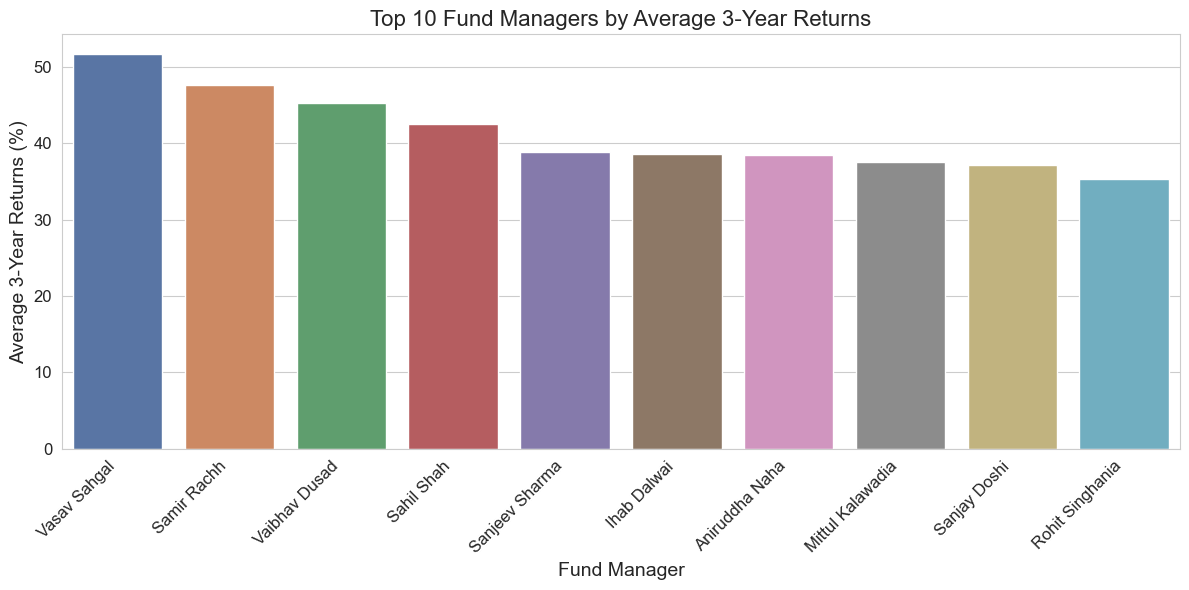

In [121]:
top_managers = data.groupby('fund_manager')['returns_3yr'].mean().sort_values(ascending=False).head(10)
top_managers_df = top_managers.reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='fund_manager', y='returns_3yr', data=top_managers_df, palette='deep')
plt.title('Top 10 Fund Managers by Average 3-Year Returns', fontsize=16)
plt.xlabel('Fund Manager', fontsize=14)
plt.ylabel('Average 3-Year Returns (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



In [123]:
# Risk-Return Tradeoff

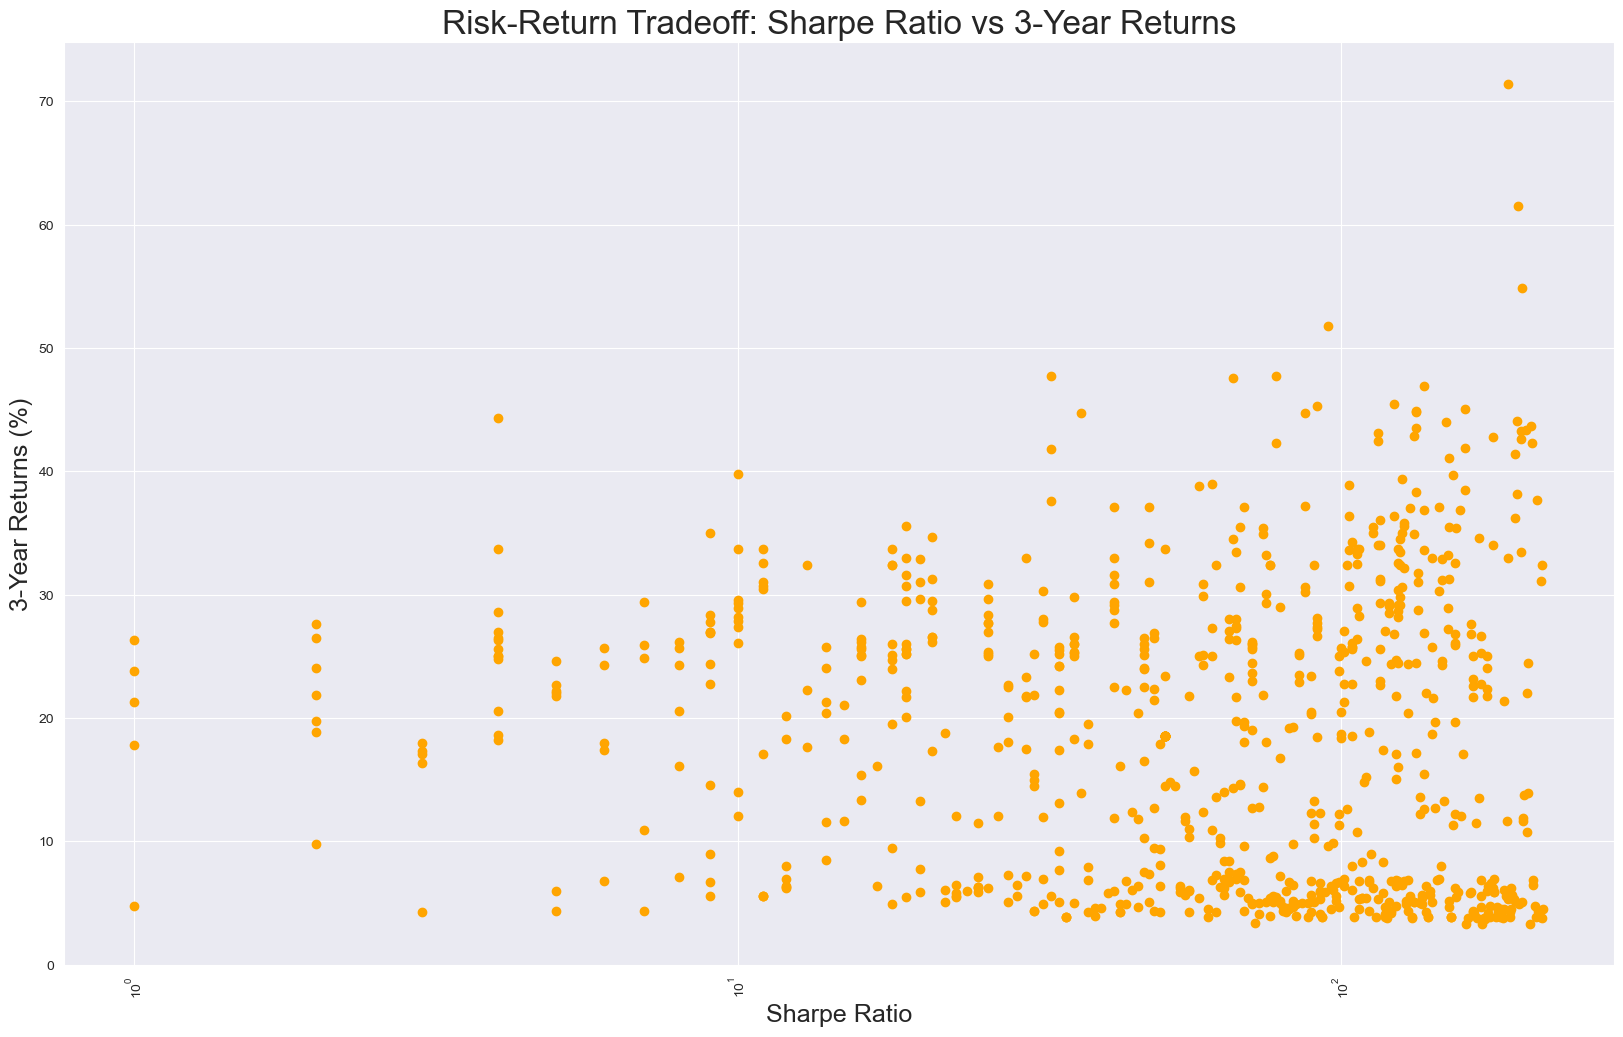

In [177]:
sns.set_style("dark")
plt.figure(figsize=(20, 12))
plt.grid()
plt.scatter(data['sharpe'], data['returns_3yr'], alpha=1,color="orange")
plt.xscale('log')
plt.xlabel('Sharpe Ratio',fontsize=18)
plt.ylabel('3-Year Returns (%)',fontsize=18)
plt.title('Risk-Return Tradeoff: Sharpe Ratio vs 3-Year Returns',fontsize=24)
plt.xticks(rotation=90, fontsize=10)
plt.show()

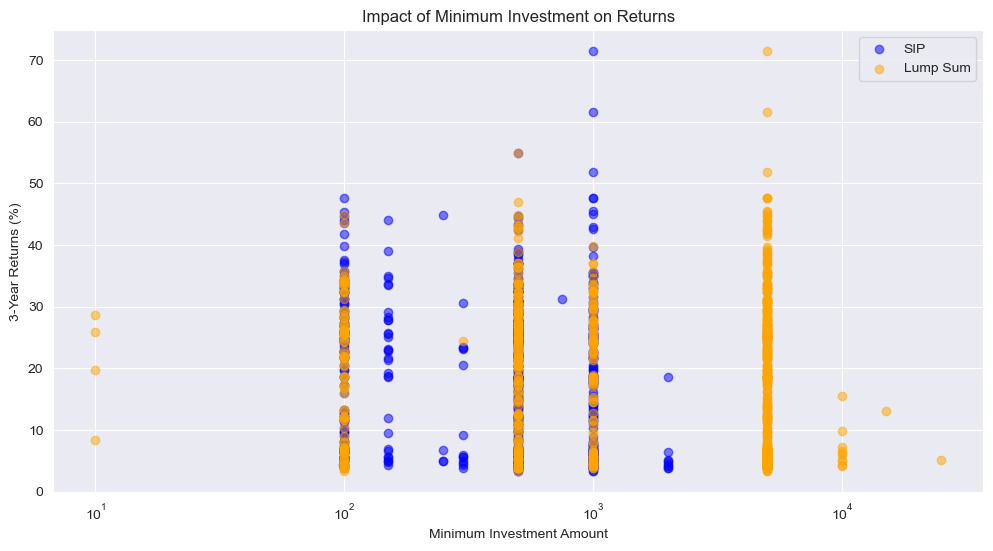

In [235]:
# Impact of Minimum SIP/Lump Sum Investment
sns.set_style("dark")

plt.figure(figsize=(12, 6))
plt.scatter(data['min_sip'], data['returns_3yr'], alpha=0.5, label='SIP',color="blue")
plt.scatter(data['min_lumpsum'], data['returns_3yr'], alpha=0.5, label='Lump Sum',color="orange")
plt.xscale('log')
plt.grid()
plt.xlabel('Minimum Investment Amount')
plt.ylabel('3-Year Returns (%)')
plt.title('Impact of Minimum Investment on Returns')
plt.legend()
plt.show()